## Введение в анализ данных и машинное обучение на Python

### Тема 5: Графический анализ данных и визуализация (16 ноября 2019)

---

#### Часть 1: Подготовка данных

__Задание 1:__ Импортируйте необходимые библиотеки:
- `numpy` как `np`
- `pandas` как `pd`
- `matplotlib.pyplot` как `plt`

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В некоторых библиотеках имеются уже готовые наборы данных, которые можно использовать для анализа. Одна из таких библиотек - `sklearn`, с которой мы будем часто работать в дальнейшем.

Мы будем работать с набором данных `load_boston`, в котором требуется предсказать цену на жильё.

[Описание данных](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

In [84]:
from sklearn.datasets import load_boston # Импортировать набор данных
boston_data = load_boston() # Загрузить данные 

Данные загружены в специфическом формате:

__Задание 2:__  используя команду `type()` определите формат данных.

In [85]:
type(boston_data) # Формат данных

sklearn.utils.Bunch

Посмотрим на описание данных:

__Задание 3:__ К элементам `boston_data` можно обращаться, как к элементам словаря. Используя команду `print()`, выведите описание данных (ключ `"DESCR"`).

In [86]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

__Задание 4:__ Определите число число наблюдений и число признаков в наборе данных (ключ – `"data"`).

In [87]:
boston_data['data'].shape # Признаки

(506, 13)

__Задание 5:__ Выведите размер вектора предсказываемой переменной (ключ – `"target"`).

In [88]:
boston_data['target'].shape # Зависимая переменная

(506,)

Приведём данные в удобный вид:

In [89]:
X = boston_data['data']
Y = boston_data['target']

In [90]:
data = pd.DataFrame(X) # Создание DataFrame на основе признаков

In [91]:
data.shape

(506, 13)

In [92]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


__Задание 6:__ Используя команду `data.columns`, присвойте датафрему понятные имена столбцов (ключ – `"feature_names"`).

In [93]:
data.columns = boston_data['feature_names'] # Имена столбцов

In [94]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


__Задание 7:__ Добавьте в датафрейм предсказываемую переменную. Назовите новый столбец `"target"`.

In [95]:
data['target'] = Y # Добавление зависимой переменной

In [96]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---

#### Часть 2: Визуализация данных. Графический анализ

Команда `data.isna()` выдаёт логический вектор где значения `True` соответствуют наличию NA.

__Задание 8:__ Определите, есть ли в выборке пропущенные значения (NA).

In [97]:
np.sum(data.isna())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

Если бы пропущенные значения были, то их можно бы было, например, удалить с помощью:

In [98]:
data = data.dropna()

In [99]:
data.shape # Ничего не изменилось, потому что NA нет

(506, 14)

__Задание 9:__ Постройте диаграммы рассеяния для ответа на следующие вопросы: 

Зависит ли цена на жильё (`target`) от уровня преступности (`CRIM`)?

Text(0, 0.5, 'Цена на жильё')

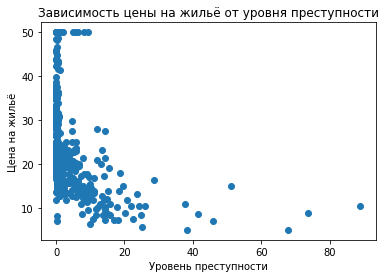

In [100]:
plt.scatter(data['CRIM'], data['target'])
plt.title('Зависимость цены на жильё от уровня преступности')
plt.xlabel('Уровень преступности')
plt.ylabel('Цена на жильё')

Зависит ли цена на жильё (`target`) от расстояния до ближайшего рабочего центра (`DIS`)?

Text(0, 0.5, 'Цена на жильё')

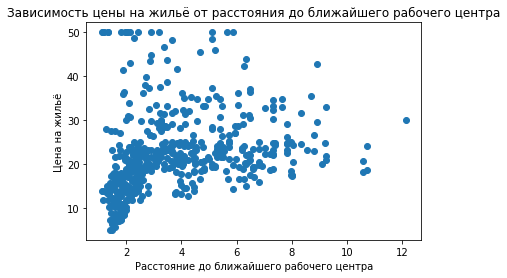

In [101]:
plt.scatter(data['DIS'], data['target'])
plt.title('Зависимость цены на жильё от расстояния до ближайшего рабочего центра')
plt.xlabel('Расстояние до ближайшего рабочего центра')
plt.ylabel('Цена на жильё')

Зависит ли цена на жильё (`target`) от среднего числа комнат в квартире (`RM`)? 

Text(0, 0.5, 'Цена на жильё')

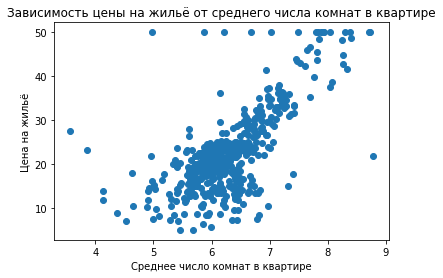

In [102]:
plt.scatter(data['RM'], data['target'])
plt.title('Зависимость цены на жильё от среднего числа комнат в квартире')
plt.xlabel('Среднее число комнат в квартире')
plt.ylabel('Цена на жильё')

__Задание 10:__ для каждого графика определите тип зависимости, если она есть:
1. Линейная / нелинейная.
2. Прямая / обратная.

__Задание 11:__ Определите, по последнему графику, есть ли в выборке аутлайеры (выбросы).

Установим следующие границы: 
- Цена на жильё: < 45
- Среднее число комнат: от 4 до 8

__Задание 12:__ Очистите выборку от аутлайеров.

In [103]:
data = data[data['target'] < 45]
data = data[data['RM'] >= 4]
data = data[data['RM'] <= 8]

Text(0, 0.5, 'Цена на жильё')

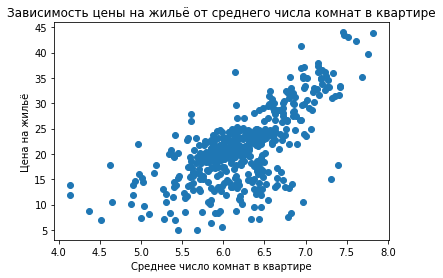

In [104]:
plt.scatter(data['RM'], data['target'])
plt.title('Зависимость цены на жильё от среднего числа комнат в квартире')
plt.xlabel('Среднее число комнат в квартире')
plt.ylabel('Цена на жильё')

Как не угадывать? 

Корреляционная матрица: `data.corr()`.

In [105]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199650,0.403996,-0.064339,0.419500,-0.218118,0.353872,-0.383131,0.628586,0.583378,0.283200,-0.379872,0.461637,-0.476810
ZN,-0.199650,1.000000,-0.532144,-0.055381,-0.515350,0.352632,-0.566838,0.680684,-0.306611,-0.300287,-0.378028,0.175646,-0.434256,0.438793
INDUS,0.403996,-0.532144,1.000000,0.034995,0.763930,-0.411963,0.643611,-0.717131,0.590957,0.710804,0.372613,-0.358669,0.635373,-0.612634
CHAS,-0.064339,-0.055381,0.034995,1.000000,0.084073,0.007164,0.075315,-0.079436,-0.044297,-0.076738,-0.119209,0.042162,0.007514,0.073924
NOX,0.419500,-0.515350,0.763930,0.084073,1.000000,-0.335410,0.730336,-0.769555,0.608078,0.662869,0.179283,-0.382284,0.620164,-0.554171
RM,-0.218118,0.352632,-0.411963,0.007164,-0.335410,1.000000,-0.286806,0.266468,-0.188685,-0.264561,-0.272905,0.094560,-0.630534,0.668003
AGE,0.353872,-0.566838,0.643611,0.075315,0.730336,-0.286806,1.000000,-0.742025,0.452383,0.500917,0.271444,-0.276576,0.652460,-0.533258
DIS,-0.383131,0.680684,-0.717131,-0.079436,-0.769555,0.266468,-0.742025,1.000000,-0.490201,-0.532777,-0.250100,0.297402,-0.551612,0.405689
RAD,0.628586,-0.306611,0.590957,-0.044297,0.608078,-0.188685,0.452383,-0.490201,1.000000,0.908891,0.451867,-0.448248,0.522353,-0.514056
TAX,0.583378,-0.300287,0.710804,-0.076738,0.662869,-0.264561,0.500917,-0.532777,0.908891,1.000000,0.439811,-0.444515,0.570119,-0.594310


__Задание 13:__ Определите, какие переменные наиболее коррелированы с зависимой переменной.

Видим, что у переменной `LSTAT` достаточно большая корреляция с зависимой переменной. Проверим это.

__Задание 14:__ Постройте диаграмму рассеяния зависимой переменной против переменной `LSTAT`.

Text(0, 0.5, 'Цена на жильё')

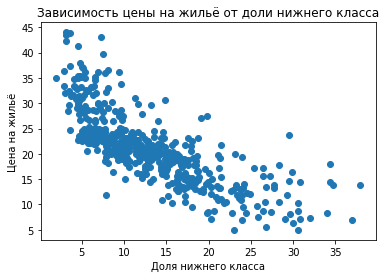

In [107]:
plt.scatter(data['LSTAT'], data['target'])
plt.title('Зависимость цены на жильё от доли нижнего класса')
plt.xlabel('Доля нижнего класса')
plt.ylabel('Цена на жильё')

__Задание 15:__ Постройте гистограмму объясняющей переменной.

Изучим объясняющую переменную:

(array([ 21.,  30.,  71., 111., 127.,  42.,  35.,  24.,   9.,   6.]),
 array([ 5. ,  8.9, 12.8, 16.7, 20.6, 24.5, 28.4, 32.3, 36.2, 40.1, 44. ]),
 <a list of 10 Patch objects>)

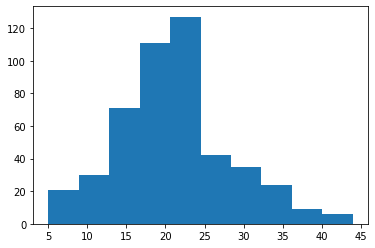

In [108]:
plt.hist(data['target'])

#### Часть 3: Категориальные переменные.

In [114]:
d = {'weather': ['cold', 'warm', 'sunny', 'windy', 'stormy', 'snowy', 'warm', 'sunny', 'sunny', 'stormy']}
simple_data = pd.DataFrame(d)

In [116]:
simple_data

,weather
0,cold
1,warm
2,sunny
3,windy
4,stormy
5,snowy
6,warm
7,sunny
8,sunny
9,stormy


In [117]:
pd.get_dummies(simple_data) # Дамми-переменные

,weather_cold,weather_snowy,weather_stormy,weather_sunny,weather_warm,weather_windy
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0
5,0,1,0,0,0,0
6,0,0,0,0,1,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,0,1,0,0,0


In [121]:
pd.Categorical(simple_data['weather'])

[cold, warm, sunny, windy, stormy, snowy, warm, sunny, sunny, stormy]
Categories (6, object): [cold, snowy, stormy, sunny, warm, windy]

In [122]:
pd.Categorical(simple_data['weather']).codes

array([0, 4, 3, 5, 2, 1, 4, 3, 3, 2], dtype=int8)

In [123]:
simple_data['categorical'] = pd.Categorical(simple_data['weather']).codes

In [124]:
simple_data

,weather,categorical
0,cold,0
1,warm,4
2,sunny,3
3,windy,5
4,stormy,2
5,snowy,1
6,warm,4
7,sunny,3
8,sunny,3
9,stormy,2
